<a href="https://colab.research.google.com/github/BonellPatinoE/CD48-in-myeloma/blob/main/CD48_Transcription_Factor_coMMpass_model_(89_TFs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/My Drive/ML-AI/ML projects/CD48_Transcription_Factor.csv')

In [ ]:
df.head()

,CD48,PAX5,SPI1,TAF1,TBP,YY1,ATF2,BCL3,CTCF,EBF1,ELF1,EP300,MTA3,POLR2A,RAD21,RELA,RUNX3,TCF12,ARID3A,ARNT,ATF7,BACH1,BHLHE40,CUX1,DPF2,EED,ETV6,GATAD2B,IKZF1,IKZF2,MEF2B,MTA2,NBN,NFATC3,RB1,RELB,SKIL,SMAD1,SMAD5,STAT3,TBX21,TRIM22,ZNF143,ZNF592,ZNF687,CHD2,FOXM1,IRF4,PML,POU2F2,SMC3,STAT5A,WRNIP1,ZBTB33,CEBPA,CEBPB,ELK1,ETS1,ETS2,FOXA1,FOXP3,GATA1,GATA2,GTF2I,HNF1A,HNF1B,IRF1,JUN,JUND,MYB,NF1,NFATC1,NFATC2,NFIC,NFKB1,NFYA,NFYB,NR3C1,PGR,RARA,RARB,RBPJ,RXRA,STAT1,STAT4,TFAP2A,TP53,VDR,XBP1
0,12.969027,5.954196,9.174926,10.236014,8.370687,11.321364,10.647458,9.636625,11.530894,1.000000,11.298635,11.883407,9.310613,11.781360,12.409126,11.259743,10.301496,11.550266,11.813380,10.188589,8.299208,11.586371,9.409391,11.630267,10.495855,8.430453,10.525521,10.603626,11.784635,9.027906,2.000000,11.007728,11.241983,10.691744,11.972980,9.090112,11.452241,4.169925,11.127350,12.011227,5.209453,8.154818,8.754888,11.024447,11.173677,12.148159,8.366322,14.233320,9.771489,12.718747,11.385323,7.276124,10.237210,10.521600,6.554589,10.023754,9.636625,8.033423,5.672425,9.184875,3.584963,1.000000,0.000000,9.432542,1.000000,1.000000,11.975131,18.170086,15.951399,4.643856,10.408330,9.861087,9.654636,8.392317,10.897089,10.247928,9.829723,12.800900,8.118941,8.622052,3.584963,11.060696,9.566054,12.160187,8.744834,6.303781,9.897845,11.893681,17.687533
1,13.657430,11.653293,10.995060,9.748193,7.366322,11.685625,10.791163,10.308339,11.208234,2.321928,11.759056,11.291171,9.409391,12.541581,12.297776,12.651052,11.213712,11.528942,12.027215,10.090112,9.108524,10.743151,8.957102,11.898979,11.683433,8.098032,10.669771,10.308339,12.419697,1.000000,3.807355,12.077150,10.857981,10.015415,12.277869,11.997885,10.635718,8.087463,11.029977,12.585901,4.754888,9.214319,9.364135,11.497353,11.166163,10.824163,5.700440,15.615141,11.202124,12.548099,10.388017,8.982994,10.099348,11.194141,5.614710,9.896332,10.345405,12.623424,6.658211,0.000000,2.584963,3.700440,2.321928,9.994353,0.000000,2.321928,10.929998,15.150977,12.912515,3.807355,11.277287,10.295769,10.759056,10.779719,10.801708,10.062046,9.753217,13.125575,0.000000,9.264443,2.321928,11.348175,10.425216,12.493355,8.942515,1.000000,11.214926,11.270295,16.345232
2,14.152206,12.397675,11.091435,12.339850,9.111136,12.485578,11.357002,11.691307,12.002815,1.000000,12.477758,13.184565,10.864960,13.299208,12.664003,13.149271,11.599913,12.412570,13.260479,11.777255,10.816984,11.658658,8.614710,12.407268,12.505315,9.954196,11.991876,11.508290,13.259743,3.807355,6.741467,13.085804,12.047124,10.565102,12.667112,13.076649,12.187352,9.324181,12.519636,13.423510,3.807355,10.704768,10.083479,12.964882,12.053926,14.181463,7.303781,17.876667,12.178665,14.576661,11.961811,9.269127,11.057992,11.993292,6.149747,11.080151,10.484823,13.268103,7.257388,0.000000,2.807355,4.523562,2.000000,11.314583,2.807355,2.584963,12.178042,13.063395,12.595024,4.643856,12.414685,10.273796,11.800496,11.385323,11.985486,11.512740,10.431498,14.105581,3.169925,9.710806,3.584963,11.782589,10.787086,13.082482,10.862637,2.321928,11.635718,11.433064,17.430314
3,13.337622,12.018200,10.666224,11.554109,8.184875,11.722808,10.605480,10.588715,10.961450,0.000000,11.407268,12.391512,10.129283,12.778488,11.911017,12.350110,10.267957,11.685625,12.534060,10.728771,9.949827,10.998590,8.778077,11.952377,11.658658,8.912889,10.993646,10.509775,12.179287,1.584963,6.523562,12.032735,10.874981,9.627534,12.001056,11.801708,11.399278,8.224002,11.531381,12.579552,3.459432,9.638436,9.361944,12.149112,11.237807,13.218715,6.700440,16.686159,11.285980,13.517669,10.854089,8.596190,10.463524,11.155451,6.491853,10.663558,9.759888,11.781360,6.523562,0.000000,3.700440,6.339850,2.000000,10.612868,1.000000,2.000000,11.529431,15.457381,13.497478,4.643856,11.679920,9.744834,10.379378,10.709945,10.877284,10.754052,9.686501,13.185185,0.000000,8.942515,1.000000,11.002815,10.330917,11.847449,9.469642,3.000000,10.834471,10.796040,16.411064
4,13.162863,11.622509,10.796851,11.631632,9.359750,12.025486,11.6

In [ ]:
# Defining the function for creating boxplot and histogram to define distribution, plot median, mean and quartiles.


def histogram_boxplot(
    data, feature, figsize=(10, 6), kde=True, bins=None
):  # kde True to trace the tendency
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (True)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.4, 0.6)},
        figsize=figsize,
    )  # creating the 2 subplots

    # boxplot will be created and a triangle will indicate the mean value of the column

    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="royalblue")

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="lightblue"
        )
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, color="darkred"
        )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

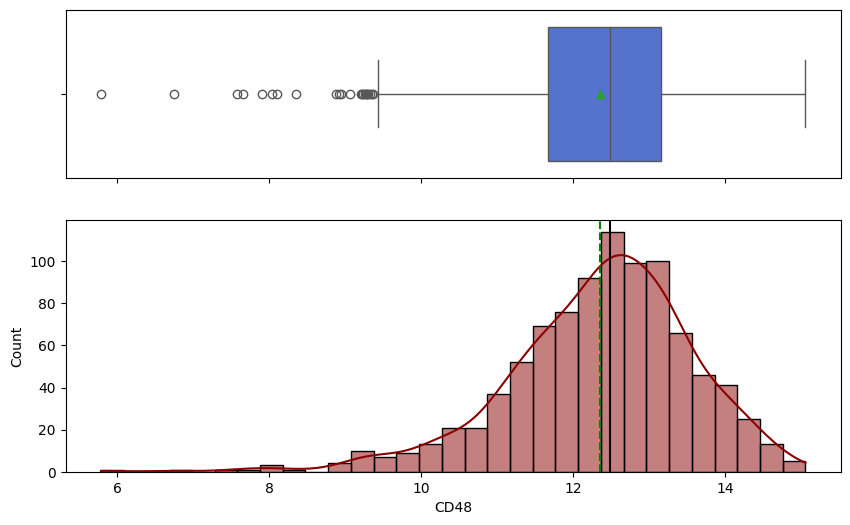

In [ ]:
# Applying the function to get histogram and boxplot based on CD70 variable
histogram_boxplot(df, "CD48")

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# Ensure 'CD48' is in the columns
if 'CD48' in df.columns:
    # Calculate the correlation of 'CD48' with all other columns
    cd48_corr = df.corrwith(df['CD48'], method='pearson')

    # Print the correlation values
    print(cd48_corr)
else:
    print("Column 'CD48' not found in the DataFrame.")


CD48      1.000000
PAX5     -0.071128
SPI1     -0.025072
TAF1      0.240686
TBP       0.171497
            ...   
STAT4    -0.018995
TFAP2A    0.282901
TP53      0.327665
VDR       0.245370
XBP1      0.129445
Length: 89, dtype: float64


In [ ]:
cd48_corr

,0
CD48,1.000000
PAX5,-0.071128
SPI1,-0.025072
TAF1,0.240686
TBP,0.171497
...,...
STAT4,-0.018995
TFAP2A,0.282901
TP53,0.327665
VDR,0.245370


In [ ]:
#cd48_corr.to_csv('CD48_correlation_Transcription_Factor.csv', header=True, index=True)

In [ ]:
# Sort the correlation values in descending order
sorted_cd48_corr = cd48_corr.sort_values(ascending=False)

# Display the top correlations
print(sorted_cd48_corr.head(10))  # Display top 10 correlated features with 'CD48'


CD48      1.000000
IRF4      0.408958
TCF12     0.380955
CUX1      0.378300
WRNIP1    0.361676
DPF2      0.354273
NFYA      0.346557
TP53      0.327665
PML       0.321002
GTF2I     0.315616
dtype: float64


In [ ]:
# Display the bottom correlations
print(sorted_cd48_corr.tail(10))  # Display top 10 correlated features with 'CD48'


GATA2      0.007811
STAT4     -0.018995
NFATC1    -0.021261
SPI1      -0.025072
BHLHE40   -0.032262
ETS2      -0.060012
EBF1      -0.067697
PAX5      -0.071128
STAT5A    -0.092142
MEF2B     -0.101803
dtype: float64


In [ ]:
# Display the bottom correlations
cd48_corr[cd48_corr < -0.1]

,0
MEF2B,-0.101803


In [ ]:
df.head()

,CD48,PAX5,SPI1,TAF1,TBP,YY1,ATF2,BCL3,CTCF,EBF1,ELF1,EP300,MTA3,POLR2A,RAD21,RELA,RUNX3,TCF12,ARID3A,ARNT,ATF7,BACH1,BHLHE40,CUX1,DPF2,EED,ETV6,GATAD2B,IKZF1,IKZF2,MEF2B,MTA2,NBN,NFATC3,RB1,RELB,SKIL,SMAD1,SMAD5,STAT3,TBX21,TRIM22,ZNF143,ZNF592,ZNF687,CHD2,FOXM1,IRF4,PML,POU2F2,SMC3,STAT5A,WRNIP1,ZBTB33,CEBPA,CEBPB,ELK1,ETS1,ETS2,FOXA1,FOXP3,GATA1,GATA2,GTF2I,HNF1A,HNF1B,IRF1,JUN,JUND,MYB,NF1,NFATC1,NFATC2,NFIC,NFKB1,NFYA,NFYB,NR3C1,PGR,RARA,RARB,RBPJ,RXRA,STAT1,STAT4,TFAP2A,TP53,VDR,XBP1
0,12.969027,5.954196,9.174926,10.236014,8.370687,11.321364,10.647458,9.636625,11.530894,1.000000,11.298635,11.883407,9.310613,11.781360,12.409126,11.259743,10.301496,11.550266,11.813380,10.188589,8.299208,11.586371,9.409391,11.630267,10.495855,8.430453,10.525521,10.603626,11.784635,9.027906,2.000000,11.007728,11.241983,10.691744,11.972980,9.090112,11.452241,4.169925,11.127350,12.011227,5.209453,8.154818,8.754888,11.024447,11.173677,12.148159,8.366322,14.233320,9.771489,12.718747,11.385323,7.276124,10.237210,10.521600,6.554589,10.023754,9.636625,8.033423,5.672425,9.184875,3.584963,1.000000,0.000000,9.432542,1.000000,1.000000,11.975131,18.170086,15.951399,4.643856,10.408330,9.861087,9.654636,8.392317,10.897089,10.247928,9.829723,12.800900,8.118941,8.622052,3.584963,11.060696,9.566054,12.160187,8.744834,6.303781,9.897845,11.893681,17.687533
1,13.657430,11.653293,10.995060,9.748193,7.366322,11.685625,10.791163,10.308339,11.208234,2.321928,11.759056,11.291171,9.409391,12.541581,12.297776,12.651052,11.213712,11.528942,12.027215,10.090112,9.108524,10.743151,8.957102,11.898979,11.683433,8.098032,10.669771,10.308339,12.419697,1.000000,3.807355,12.077150,10.857981,10.015415,12.277869,11.997885,10.635718,8.087463,11.029977,12.585901,4.754888,9.214319,9.364135,11.497353,11.166163,10.824163,5.700440,15.615141,11.202124,12.548099,10.388017,8.982994,10.099348,11.194141,5.614710,9.896332,10.345405,12.623424,6.658211,0.000000,2.584963,3.700440,2.321928,9.994353,0.000000,2.321928,10.929998,15.150977,12.912515,3.807355,11.277287,10.295769,10.759056,10.779719,10.801708,10.062046,9.753217,13.125575,0.000000,9.264443,2.321928,11.348175,10.425216,12.493355,8.942515,1.000000,11.214926,11.270295,16.345232
2,14.152206,12.397675,11.091435,12.339850,9.111136,12.485578,11.357002,11.691307,12.002815,1.000000,12.477758,13.184565,10.864960,13.299208,12.664003,13.149271,11.599913,12.412570,13.260479,11.777255,10.816984,11.658658,8.614710,12.407268,12.505315,9.954196,11.991876,11.508290,13.259743,3.807355,6.741467,13.085804,12.047124,10.565102,12.667112,13.076649,12.187352,9.324181,12.519636,13.423510,3.807355,10.704768,10.083479,12.964882,12.053926,14.181463,7.303781,17.876667,12.178665,14.576661,11.961811,9.269127,11.057992,11.993292,6.149747,11.080151,10.484823,13.268103,7.257388,0.000000,2.807355,4.523562,2.000000,11.314583,2.807355,2.584963,12.178042,13.063395,12.595024,4.643856,12.414685,10.273796,11.800496,11.385323,11.985486,11.512740,10.431498,14.105581,3.169925,9.710806,3.584963,11.782589,10.787086,13.082482,10.862637,2.321928,11.635718,11.433064,17.430314
3,13.337622,12.018200,10.666224,11.554109,8.184875,11.722808,10.605480,10.588715,10.961450,0.000000,11.407268,12.391512,10.129283,12.778488,11.911017,12.350110,10.267957,11.685625,12.534060,10.728771,9.949827,10.998590,8.778077,11.952377,11.658658,8.912889,10.993646,10.509775,12.179287,1.584963,6.523562,12.032735,10.874981,9.627534,12.001056,11.801708,11.399278,8.224002,11.531381,12.579552,3.459432,9.638436,9.361944,12.149112,11.237807,13.218715,6.700440,16.686159,11.285980,13.517669,10.854089,8.596190,10.463524,11.155451,6.491853,10.663558,9.759888,11.781360,6.523562,0.000000,3.700440,6.339850,2.000000,10.612868,1.000000,2.000000,11.529431,15.457381,13.497478,4.643856,11.679920,9.744834,10.379378,10.709945,10.877284,10.754052,9.686501,13.185185,0.000000,8.942515,1.000000,11.002815,10.330917,11.847449,9.469642,3.000000,10.834471,10.796040,16.411064
4,13.162863,11.622509,10.796851,11.631632,9.359750,12.025486,11.6

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CD48,928.0,12.356218,1.212955,5.781360,11.669437,12.491599,13.164828,15.061624
PAX5,928.0,8.029268,3.157479,0.000000,5.383626,8.103202,10.791773,16.077066
SPI1,928.0,10.222631,0.949618,4.857981,9.642953,10.153552,10.805341,13.874885
TAF1,928.0,11.343386,0.706183,8.139551,10.879196,11.344296,11.805139,13.898790
TBP,928.0,9.446202,0.684609,7.247928,8.996473,9.480790,9.880348,11.471675
...,...,...,...,...,...,...,...,...
STAT4,928.0,9.371413,1.571688,1.584963,8.621135,9.575539,10.421536,13.697511
TFAP2A,928.0,3.474380,2.484660,0.000000,1.584963,3.169925,5.426265,10.070121
TP53,928.0,10.660562,0.998555,4.643856,10.049847,10.729196,11.328815,13.866989
VDR,928.0,11.384067,0.869270,8.710806,10.838810,11.363313,11.940034,14.390236


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 89 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CD48     928 non-null    float64
 1   PAX5     928 non-null    float64
 2   SPI1     928 non-null    float64
 3   TAF1     928 non-null    float64
 4   TBP      928 non-null    float64
 5   YY1      928 non-null    float64
 6   ATF2     928 non-null    float64
 7   BCL3     928 non-null    float64
 8   CTCF     928 non-null    float64
 9   EBF1     928 non-null    float64
 10  ELF1     928 non-null    float64
 11  EP300    928 non-null    float64
 12  MTA3     928 non-null    float64
 13  POLR2A   928 non-null    float64
 14  RAD21    928 non-null    float64
 15  RELA     928 non-null    float64
 16  RUNX3    928 non-null    float64
 17  TCF12    928 non-null    float64
 18  ARID3A   928 non-null    float64
 19  ARNT     928 non-null    float64
 20  ATF7     928 non-null    float64
 21  BACH1    928 non

#Data Preparation for the model

In [ ]:
X = df.drop('CD48', axis=1)
y = df['CD48']

In [ ]:
# Splitting data into training and test set:
## I needed to remove stratify=y to give variability since there are too many values in the target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)

(742, 88) (186, 88)


In [ ]:
X_train.shape, X_test.shape

((742, 88), (186, 88))

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))

    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True:
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

    # returning the list with train and test scores
    return score_list

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Random Forest

In [ ]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [ ]:
rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.368087  0.267518   0.907497        0.895031  2.291291


In [ ]:
rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X_test,y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  1.011224  0.767525   0.311398       -0.313313  6.605076


In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

             Imp
IRF4    0.099218
TFAP2A  0.059207
TCF12   0.050355
NFATC2  0.042756
MEF2B   0.041389
...          ...
FOXP3   0.003777
GATA2   0.003568
TAF1    0.003563
RAD21   0.003331
HNF1A   0.002518

[88 rows x 1 columns]


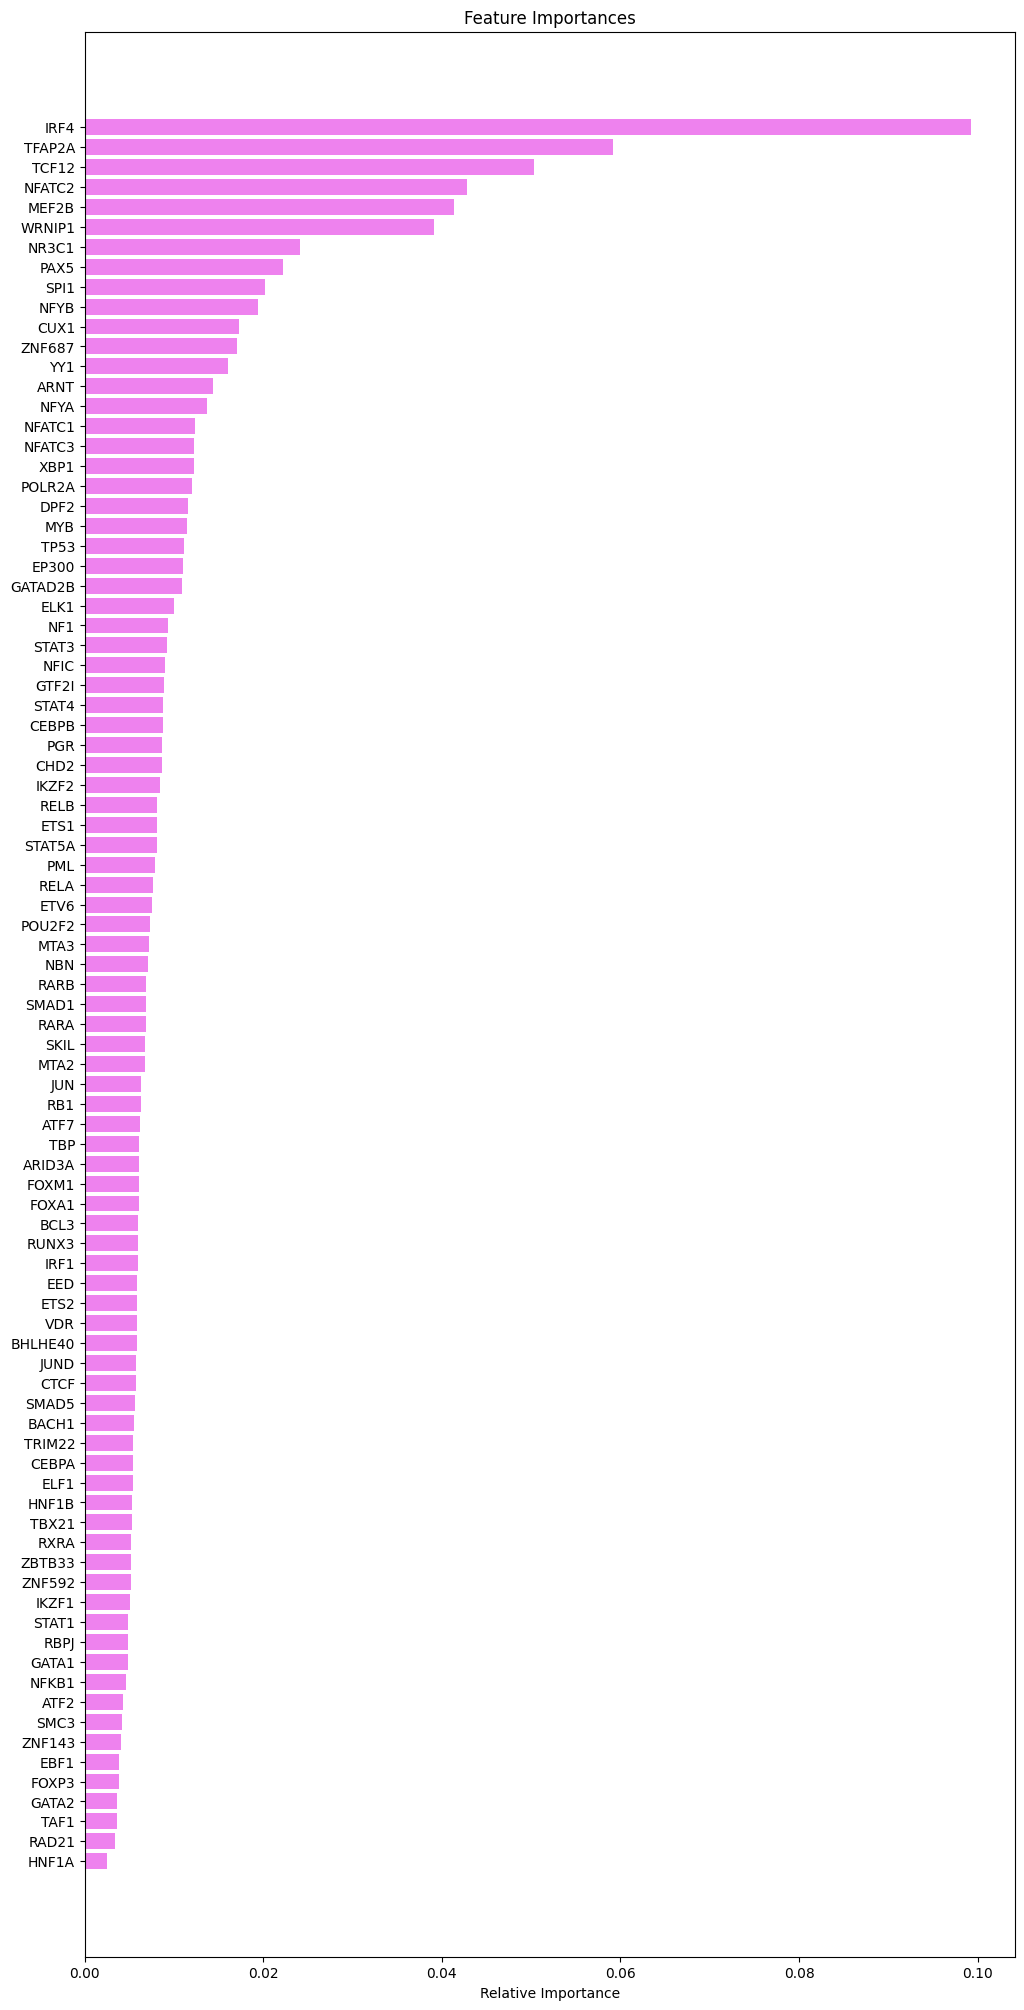

In [ ]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,25))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

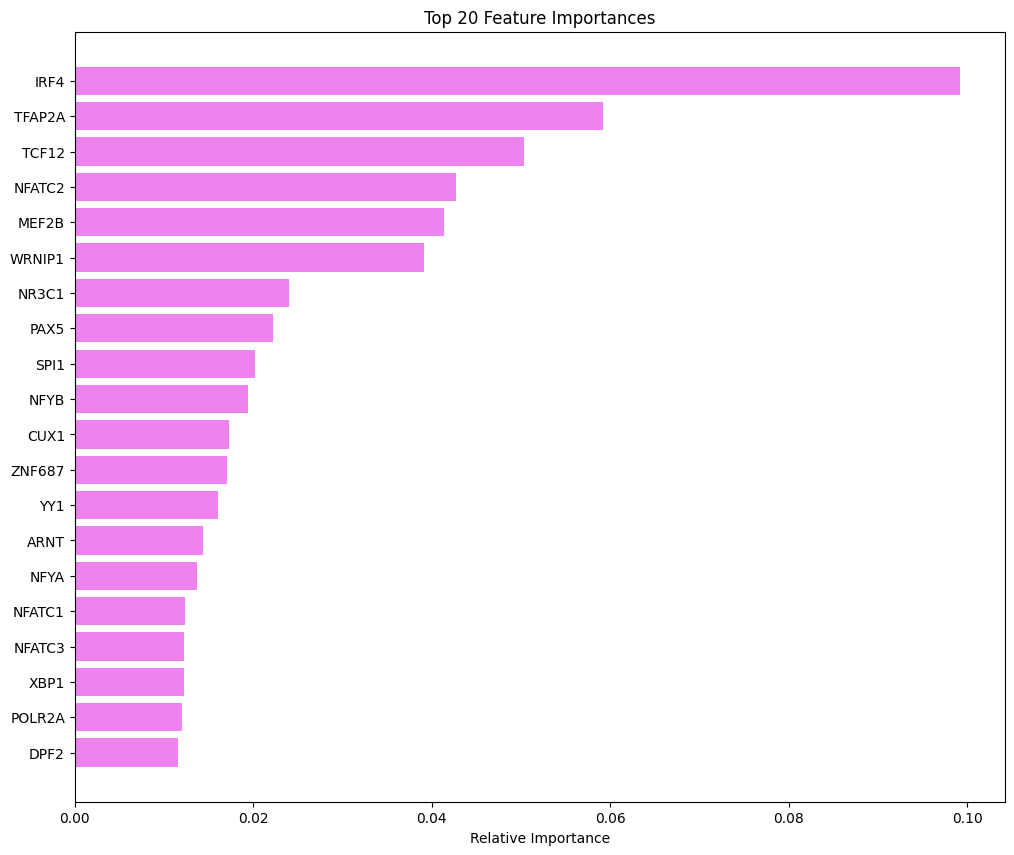

In [ ]:
# Assuming feature_names and importances are already defined
feature_names = X_train.columns
importances = rf_estimator.feature_importances_

# Get the indices of the top 20 features
top_20_indices = np.argsort(importances)[-20:]

# Sort the top 20 indices by importance in ascending order
top_20_indices = top_20_indices[np.argsort(importances[top_20_indices])]

plt.figure(figsize=(12, 10))
plt.title('Top 20 Feature Importances')
plt.barh(range(len(top_20_indices)), importances[top_20_indices], color='violet', align='center')
plt.yticks(range(len(top_20_indices)), [feature_names[i] for i in top_20_indices])
plt.xlabel('Relative Importance')
plt.show()

#XGBoost Regressor

In [ ]:
xgb_estimator=XGBRegressor(random_state=1, verbosity = 0)
xgb_estimator.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, X_train, y_train)
print("Training performance \n",xgb_estimator_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.000704  0.000509        1.0             1.0  0.004161


In [ ]:
xgb_estimator_model_test_perf = model_performance_regression(xgb_estimator, X_test,y_test)
print("Testing performance \n",xgb_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  1.052461  0.796657   0.254092       -0.422609  6.765534


##Hyperparameter Tuning

In [ ]:
%%time

# defining model
model = XGBRegressor(random_state=1)

# Parameter grid to pass in RandomizedSearchCV

param_grid={'colsample_bytree': [0.4], #np.arange(0.1,1,0.2), #[0.1, 0.5, 1], [0.5]
            'colsample_bylevel': [0.8], #np.arange(0.1,1,0.1),
            'colsample_bynode': [0.5], #np.arange(0.1,1,0.1), # [0.1, 0.5, 1]
            'gamma': [0.4], #np.arange(0.1,1,0.1),
            'learning_rate': [0.1], #np.arange(0.1,1,0.1), #[0.1, 0.3, 0.5, 0.7],
            'max_depth': [3], #np.arange(1,4,1),
            'n_estimators': [300], #np.arange(1000,2000,100), #[20,50,100,200],[300]
            'subsample':np.arange(0.1,1,0.1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=5000, scoring=scorer, cv=10, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2 = xgb_tuned2.fit(X_train,y_train)

# Set the clf to the best combination of parameters
model = xgb_tuned2.best_estimator_

# Fit the best algorithm to the data.
model.fit(X_train, y_train)

CPU times: user 9.23 s, sys: 241 ms, total: 9.47 s
Wall time: 8.33 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.8, colsample_bynode=0.5, colsample_bytree=0.4,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.4, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_tuned_model_train_perf = model_performance_regression(model, X_train, y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.250214  0.198017   0.957255        0.951495  1.637681


In [ ]:
xgb_tuned_model_test_perf = model_performance_regression(model, X_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.948405  0.724865   0.394295       -0.155211  6.140365


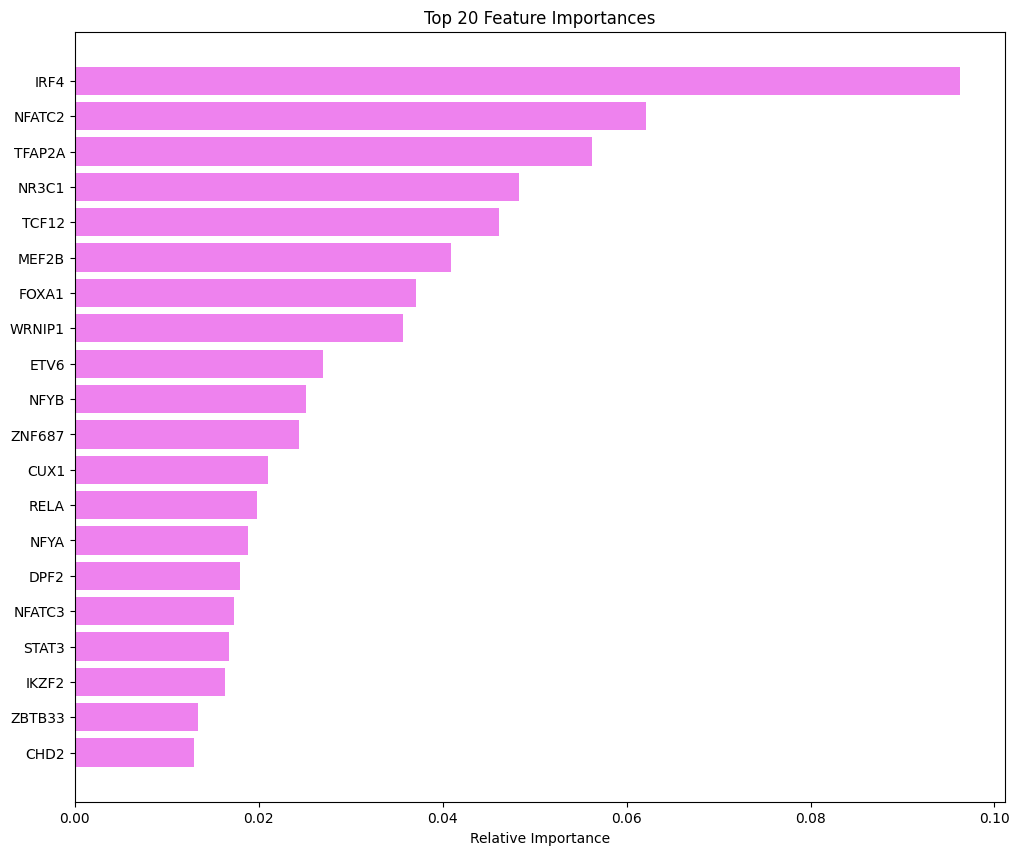

In [ ]:
# Assuming feature_names and importances are already defined
feature_names = X_train.columns
importances = xgb_estimator.feature_importances_

# Get the indices of the top 20 features
top_20_indices = np.argsort(importances)[-20:]

# Sort the top 20 indices by importance in ascending order
top_20_indices = top_20_indices[np.argsort(importances[top_20_indices])]

plt.figure(figsize=(12, 10))
plt.title('Top 20 Feature Importances')
plt.barh(range(len(top_20_indices)), importances[top_20_indices], color='violet', align='center')
plt.yticks(range(len(top_20_indices)), [feature_names[i] for i in top_20_indices])
plt.xlabel('Relative Importance')
plt.show()

##SHAP (SHapley Additive exPlanations)

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
## Initialize the package
shap.initjs()

In [ ]:
# compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

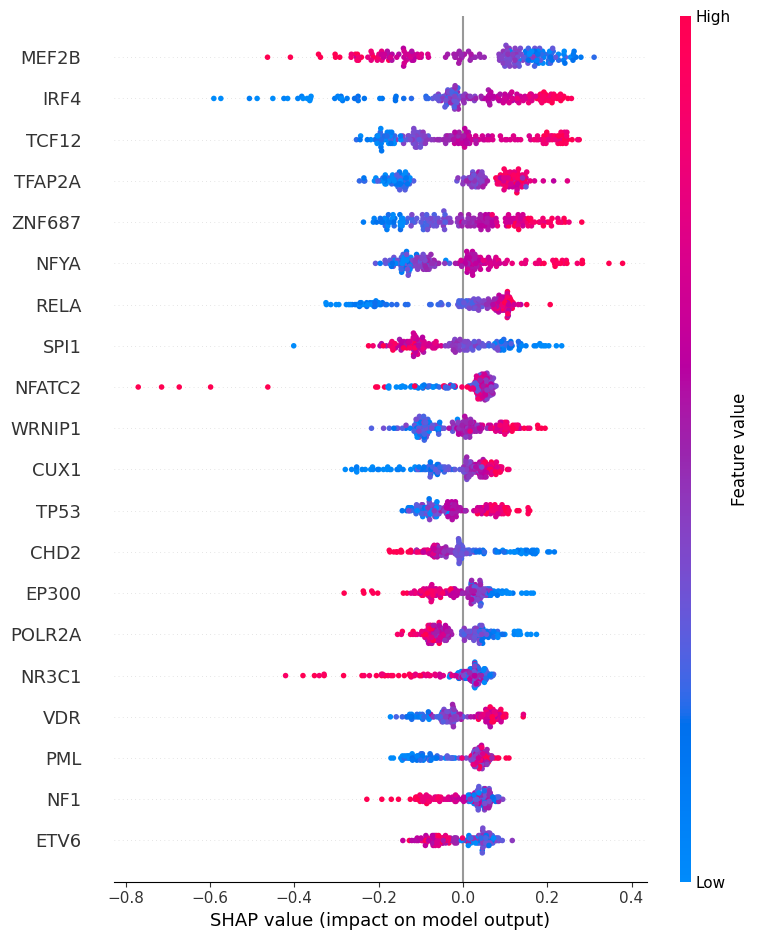

In [ ]:
# Make plot.
shap.summary_plot(shap_values, X_test)

#Scatter plot

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions2 = model.predict(X_train)

NameError: name 'model' is not defined

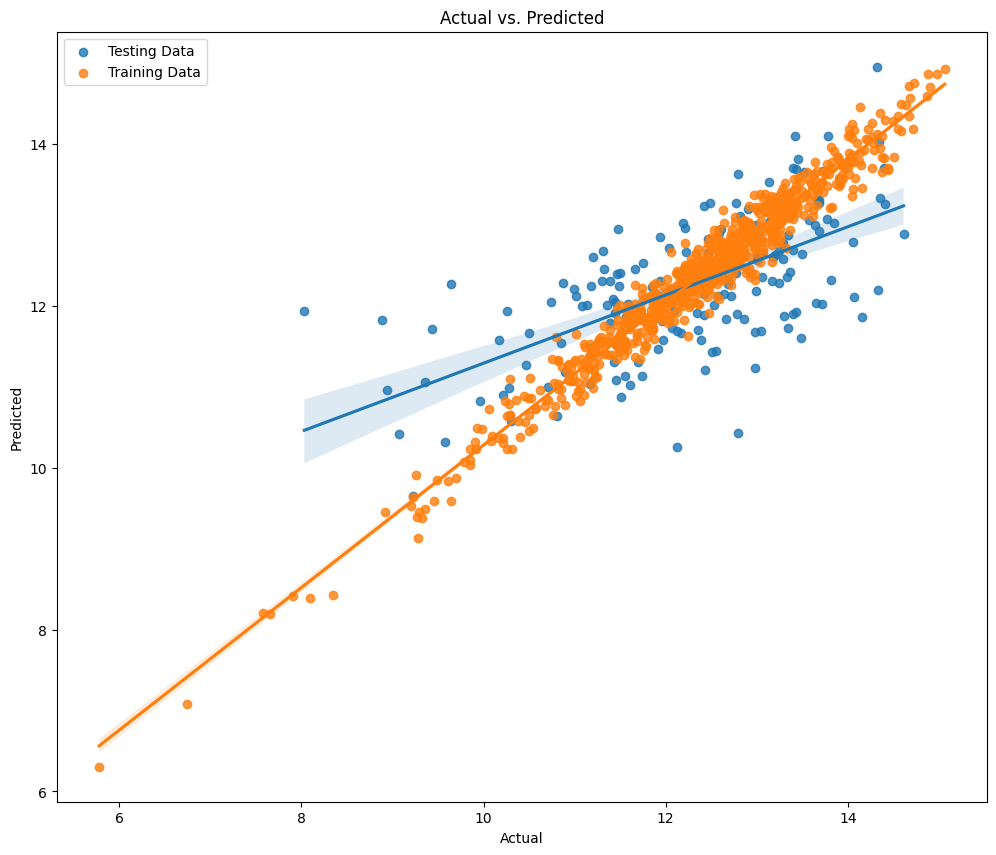

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_test, predictions, y_train, and predictions2 are defined

# Method 1: Creating a temporary DataFrame
# Create temporary DataFrames for testing and training data
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
train_df = pd.DataFrame({'Actual': y_train, 'Predicted': predictions2})

plt.figure(figsize=(12, 10))
# Use the data parameter and specify x and y columns
sns.regplot(data=test_df, x='Actual', y='Predicted', label="Testing Data")
sns.regplot(data=train_df, x='Actual', y='Predicted', label="Training Data")

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend(loc="upper left")
plt.show()